# (Investigation of Divvy bicycle sharing service dataset)

# (The effect gender, Age and weekdays on Trip duration )

## by (Hany Aly Elmogey)

## Investigation Overview
> I wanted to check what are the features that affect the trip duration the most.
## Dataset Overview
> This data set includes information about individual rides made in a bike-sharing system. I downloaded datasets for two consecutive years 2014 and 2015.
Variables:
trip_id: ID attached to each trip taken 
<br>starttime: day and time trip started, in CST
<br>stoptime: day and time trip ended, in CST
<br>bikeid: ID attached to each bike
<br>tripduration: time of trip in seconds 
<br>from_station_name: name of station where trip originated
<br>to_station_name: name of station where trip terminated 
<br>from_station_id: ID of station where trip originated
<br>to_station_id: ID of station where trip terminated
<br>usertype: "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership
<br>gender: gender of rider 
<br>birthyear: birth year of rider
link to the datasets files " https://divvy-tripdata.s3.amazonaws.com/index.html"
For more information, visit http://DivvyBikes.com/data or email questions to data@DivvyBikes.com.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("all_files_compined_after_cleaning.csv")

## Although males used the bikes more than females but the average trip duration for females is higher than males

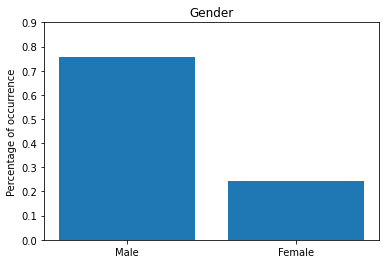

In [3]:
plt.bar(list(set(df.gender)),df.gender.value_counts()/df.gender.value_counts().sum());
plt.ylabel("Percentage of occurrence");
plt.title("Gender")
plt.yticks(np.arange(0, 1, step=0.1));

Text(0.5, 1.0, 'Gender')

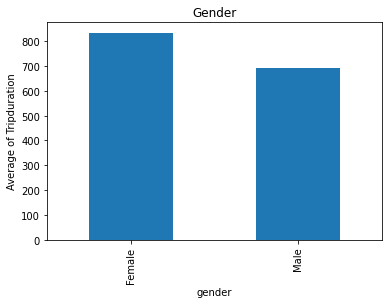

In [6]:
df.groupby("gender")["tripduration"].mean().plot(kind = "bar");
plt.ylabel("Average of Tripduration");
plt.title("Gender");

## Most of the users are in the Age group of 2 to 40 but age group 70 to 80 has the higest trip duration average

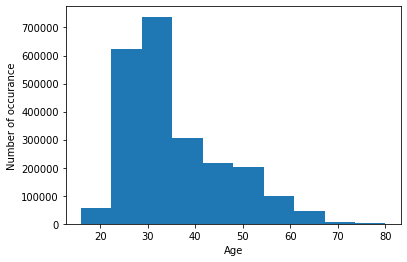

In [7]:
plt.hist(df.Age);
plt.xlabel("Age");
plt.ylabel("Number of occurance");

In [17]:
Age_labels = ["0 to 20","20 to 30","30 to 40","40 to 50","50 to 60","60 to 70","70 to 80"]

def trip_duration_with_age_calc(df):
    age_ranges = [(0,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80)]
    av_trip_duration_all = []
    av_trip_duration_male = []
    av_trip_duration_female = []
    for r in age_ranges:
        av_trip_duration_all.append(df[(df.Age > r[0]) & (df.Age < r[1])].tripduration.mean())
        av_trip_duration_male.append(df[(df.Age > r[0]) & (df.Age < r[1]) & (df.gender == "Male" )].tripduration.mean())
        av_trip_duration_female.append(df[(df.Age > r[0]) & (df.Age < r[1])& (df.gender == "Female" )].tripduration.mean())
    
    return av_trip_duration_all, av_trip_duration_male, av_trip_duration_female  


def groupby_days_with_tripduration_mean(df):
    df_female = df[df.gender == "Female"]
    df_male = df[df.gender == "Male"]
    df_female = df_female.groupby("S_Day")["tripduration"].mean()
    df_male = df_male.groupby("S_Day")["tripduration"].mean()
    return df_female, df_male



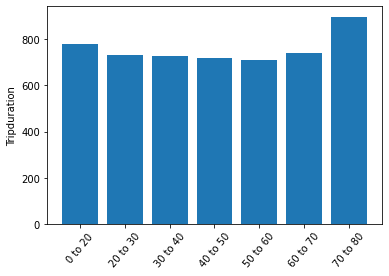

In [12]:
av_trip_duration_all, av_trip_duration_male, av_trip_duration_female  = trip_duration_with_age_calc(df)
plt.bar(range(len(av_trip_duration_all)),av_trip_duration_all,tick_label = Age_labels)

plt.ylabel("Tripduration");
plt.xticks(rotation = 50);

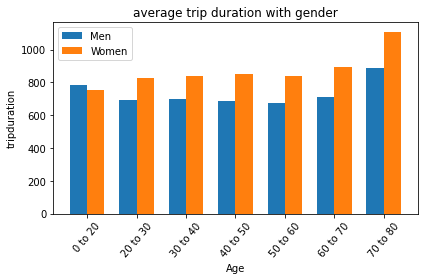

In [13]:
av_trip_duration_all, av_trip_duration_male, av_trip_duration_female  = trip_duration_with_age_calc(df)

x = np.arange(len(Age_labels))  # the label locations
width = 0.35

av_trip_duration_all = []

# max_y = max(max(av_trip_duration_male/df_male.sum()),max(df_female/df_female.sum()))*1.2
# y = np.arange(0,0.2,step = 0.02)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, av_trip_duration_male, width, label='Men')
rects2 = ax.bar(x + width/2, av_trip_duration_female, width, label='Women')

ax.set_ylabel('tripduration')
ax.set_xlabel('Age')
ax.set_title('average trip duration with gender')
ax.set_xticks(x)
# ax.set_yticks(y)
ax.set_xticklabels(Age_labels)
ax.legend()

plt.xticks(rotation = 50);

fig.tight_layout()

## The winter is the least season in the demand on bikes.


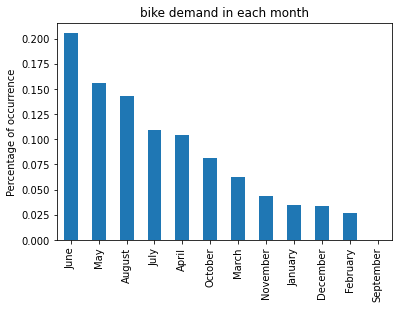

In [14]:
(df.E_Month.value_counts()/df.shape[0]).plot(kind = "bar");
plt.title("bike demand in each month");
plt.ylabel("Percentage of occurrence");

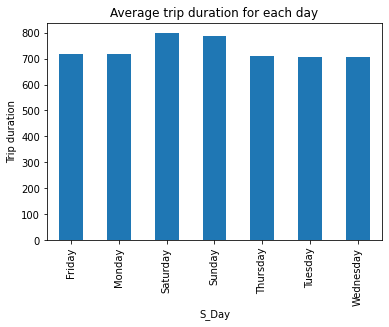

In [15]:
df.groupby("S_Day")["tripduration"].mean().plot(kind = "bar");

plt.title("Average trip duration for each day");
plt.ylabel("Trip duration");

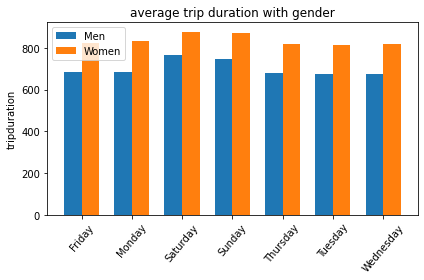

In [18]:
df_female, df_male = groupby_days_with_tripduration_mean(df)

labels = df_male.keys()
x = np.arange(len(labels))  # the label locations
width = 0.35
max_y = max(max(df_male),max(df_female))*1.2
# y = np.arange(0,max_y,step = 0.02)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_male, width, label='Men')
rects2 = ax.bar(x + width/2, df_female, width, label='Women')

ax.set_ylabel('tripduration')
ax.set_title('average trip duration with gender')
ax.set_xticks(x)
# ax.set_yticks(y)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation = 50);

fig.tight_layout()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_Divvy_bicycle_sharing_service_Data.ipynb --to slides --post serve  --no-input --no-prompt